In [1]:
print("Multimedia Security Homework 1")

Multimedia Security Homework 1


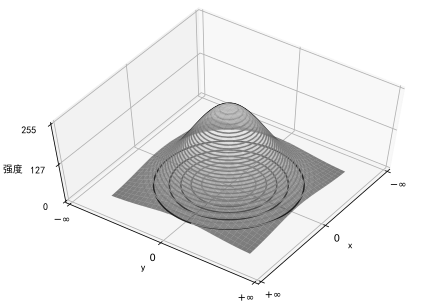

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

fig = plt.figure()

x = np.linspace(-1.5, 1.5, 32)
y = np.linspace(-1.5, 1.5, 32)

axes3d = Axes3D(fig)
X, Y=np.meshgrid(x, y)
Z = 255 * (0.36 ** ((X ** 2) + (Y ** 2)))
#axes3d.scatter(X, Y, Z, cmap='viridis')
axes3d.contour(X, Y, Z, 32, cmap='binary')
axes3d.plot_surface(X,Y,Z,alpha=0.5,cmap='gray') 
axes3d.contour(X,Y,Z,zdir='z', offset=0,cmap="gray")
axes3d.view_init(60, 35)
axes3d.set_xlabel("x")
axes3d.set_ylabel("y")
axes3d.set_zlabel("强度")
axes3d.set_xticks([-2, 0, 2])
axes3d.set_xticklabels(["$-\infty$", "$0$", "$+\infty$"])
axes3d.set_yticks([-2, 0, 2])
axes3d.set_yticklabels(["$-\infty$", "$0$", "$+\infty$"])
axes3d.set_zticks([0, 127, 255])

Text(0.5, 1.0, '强度')

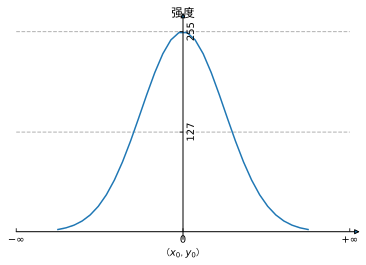

In [84]:
from mpl_toolkits.axisartist.axislines import SubplotZero
%config InlineBackend.figure_format = "svg"
fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

plt.grid(b=True, axis="y", linestyle="dashed", linewidth=1)

plt.xlim(-2, 2)
plt.xticks([-2, 0, 2], 
           ["$-\infty$", "$0$", "$+\infty$"])
plt.yticks([127, 255], ["$127$", "$255$"])
ax.axis["xzero"].label.set_text("($x_0$,$y_0$)")
z = 255 * (0.3678794 ** ((x ** 2) + (y ** 2)))
    
ax.plot(x, z)
ax.set_title("强度")

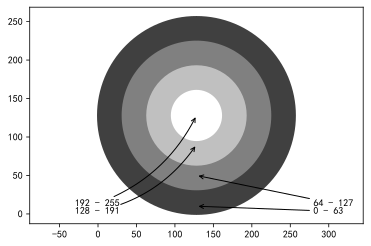

In [166]:
import matplotlib.patches as mpt
fig,ax = plt.subplots()
center = np.array([128, 128])
circle = mpt.Circle(center, 2)
ax.add_patch(circle)
plt.xlim(0, 256)
plt.ylim(0, 256)

colors = matplotlib.cm.binary_r(np.linspace(0.25, 1, 4))
                              
for i, c in zip(range(4), colors) :
    circle = mpt.Circle(center, 128 - (i * 32), color=c, lw=2)
    ax.add_patch(circle)

plt.annotate("192 - 255", xy=(128, 128),
                           xytext=(-30, 10),
                           arrowprops=dict(arrowstyle = "->", connectionstyle="arc3, rad=.2"))
plt.annotate("128 - 191", xy=(128, 90),
                           xytext=(-30, 0),
                           arrowprops=dict(arrowstyle = "->", connectionstyle="arc3, rad=.2"))
plt.annotate("64 - 127", xy=(128, 50),
                           xytext=(280, 10),
                           arrowprops=dict(arrowstyle = "->", connectionstyle="arc3, rad=.0"))
plt.annotate("0 - 63", xy=(128, 10),
                           xytext=(280, 0),
                           arrowprops=dict(arrowstyle = "->", connectionstyle="arc3, rad=.0"))
    
plt.axis('equal')
plt.show()

In [ ]:
# record
def corrCC(x, y):
    row = x.shape[0]
    EX, EY, EXY, EX2, EY2 = np.int(0), np.int(0), np.int(0), np.int(0), np.int(0)
    
    for i in range(row):
        tmpx = x.item(i)
        tmpy = y.item(i)
        EX += tmpx
        EY += tmpy
        EXY += tmpx * tmpy
        EX2 += tmpx * tmpx
        EY2 += tmpy * tmpy

    return (row * EXY - EX * EY) / np.sqrt((row * EX2 - EX * EX) * (row * EY2 - EY * EY));

# 计算两个矩阵每列之间的相关系数
def corrC(x, y):
    row = x.shape[1]
    col = y.shape[1]
    mat = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            mat[i, j] = corrCC(x[:,i], y[:,j])
    return mat

corrC(img1, img2) # 用了三重循环，效率很低，但是相关系数矩阵是正确的
# 这个函数使用Matlab的corr()函数对应的公式求出，结果是img1的列 × img2的列的矩阵
#corrcoef(A, B)